**Imports**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import os
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from sklearn import preprocessing

In [6]:
import re
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Concatenate all stories csv files**

In [7]:
df = pd.read_csv('../input/hespress/stories_art-et-culture.csv', encoding='utf8')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename != 'stories_art-et-culture.csv':
            if filename.split("_")[0] == 'stories':
                df2 = pd.read_csv(os.path.join(dirname, filename), encoding='utf8')
                df = pd.concat([df,df2], axis=0,ignore_index=True)
                #print(os.path.join(dirname, filename))
print(df[df.index.duplicated()])
df.to_csv('final.csv', index = False)
df.sample(10)

Empty DataFrame
Columns: [Unnamed: 0, id, title, date, author, story, topic]
Index: []


,Unnamed: 0,id,title,date,author,story,topic
10832,832,ad45310c04f211eba856646e69d991ea,جليد سهولي .. مبدع مغربي يدير أكبر مركز استشفا...,الجمعة 12 أكتوبر 2018 - 02:00,تيمجردين فاطمة من برلين*,بخبرته الطبية كرئيس قسم أمراض النساء والأورام ...,marocains-du-monde
6913,913,11af986e055811ebb74c646e69d991ea,هل استقبل الرسولُ مغاربة وتحدث إليهم بلسان أما...,السبت 12 أبريل 2014 - 13:45,هسبريس ـ حسن الأشرف,لم تكن تصريحات أحمد أرحموش، منسق الفدرالية الو...,tamazight
8748,748,c62bdff4055b11ebb081646e69d991ea,"عصيد يرفض ""محاصرة الحداثيين"" وإغراق الجامعات ب...",السبت 07 مارس 2020 - 18:00,هسبريس - نورالدين إكجان,متشبثة بالحق في المحاضرة بمدرجات الجامعة دون ح...,orbites
10109,109,9830a93a04ee11ebbce6646e69d991ea,مغاربة عالقون في أمريكا يتطلعون إلى موعد العود...,الأربعاء 01 يوليوز 2020 - 00:00,هسبريس من واشنطن,لا يزال عدد من المغاربة العالقين في الولايات ا...,marocains-du-monde
9615,615,8a7cdd5c04df11eb8327646e69d991ea,الملك يعزي الرئيس المصري في وفاة حسني مبارك,الأربعاء 26 فبراير 2020 - 16:31,هسبريس - و.م.ع,بعث الملك محمد السادس برقية تعزية ومواساة للرئ...,politique
9056,56,733f241804dd11eb9e16646e69d991ea,"تدخلات من خارج البرلمان تطيل مسلسل ""بلوكاج"" قا...",الأربعاء 16 شتنبر 2020 - 17:00,هسبريس - محمد بلقاسم,كشفت رئيسة لجنة القطاعات الاجتماعية بمجلس النو...,politique
7716,716,e957924604e711eb95b5646e69d991ea,"""التريبورتورات"" تثير مخاوف المواطنين بسبب ""اخت...",الأربعاء 05 غشت 2020 - 16:00,هسبريس - محمد الراجي,"ما زالت الدراجات ثلاثية العجلات ""التريبورتورات...",societe
7569,569,3f90af9c04e711ebb812646e69d991ea,تقلص حقينة السدود يُنذر بانقطاعات متكررة للماء...,الاثنين 17 غشت 2020 - 11:00,هسبريس - محمد الراجي,تشهد عدد من المدن المغربية خلال الآونة الأخيرة...,societe
3251,251,a2696364055d11eba2cf646e69d991ea,"سيناريوهان أمام جامعة الكرة بعد تفشي ""كورونا""",السبت 15 غشت 2020 - 09:20,هسبورت - آمال لكعيدا,باتت دائرة تصرف الجامعة الملكية المغربية لكرة ...,sport
2444,444,b61201c004e211eb8596646e69d991ea,"تفشّي فيروس ""كوفيد-19"" يغلق مدارس ويربك أسراً ...",السبت 05 شتنبر 2020 - 17:19,هسبريس ـ عبد الإله شبل,في الوقت الذي تستعد فيه مدارس المملكة لانطلاق ...,regions


**Number of examples per class**

In [8]:
df.topic.value_counts()

art-et-culture        1000
faits-divers          1000
regions               1000
sport                 1000
medias                1000
economie              1000
tamazight             1000
societe               1000
orbites               1000
politique             1000
marocains-du-monde    1000
Name: topic, dtype: int64

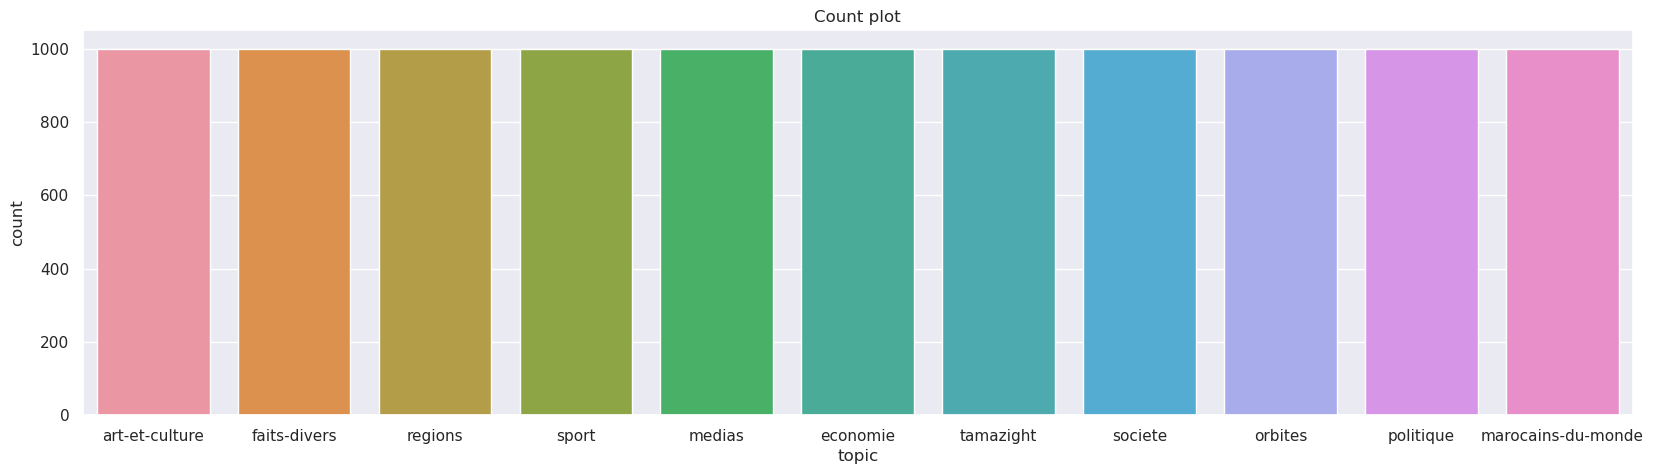

In [26]:
sns.set(rc={'figure.figsize': [20, 5]}, font_scale=1)
sns.countplot(x=df["topic"])
plt.title("Count plot")
plt.show()

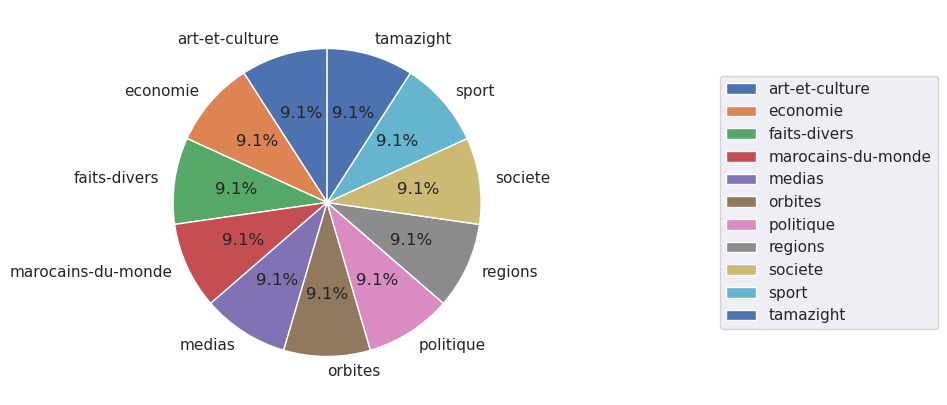

In [27]:
plt.pie(df.topic.value_counts(),autopct='%1.1f%%',startangle=90, labels = np.unique(df.topic))
plt.legend(title="",loc="center left", bbox_to_anchor =(1.5, 0, 1, 1));

In [11]:
data = df[['title', 'topic']]
data.head()

,title,topic
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",art-et-culture
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",art-et-culture
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",art-et-culture
3,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",art-et-culture
4,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",art-et-culture


**Show the arabic stop words**

In [12]:
stop_words = set(stopwords.words("arabic"))
stop_words

{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


**Function to remove the punctuation**

In [13]:
ARABIC_PUNCTUATION = '``:''"؟!؛،,.؍,-'
 
def remove_arabic_punctuations(text : str) -> str:
    chars = [char for char in text if (char not in ARABIC_PUNCTUATION)]
    output = ''.join(chars)
    return output

**Concatenate all sentences into a single string**

In [14]:
all_sentences = " ".join([sent for sent in data.title])

**Remove from the string all the punctuation**

In [15]:
filtered_sentences = remove_arabic_punctuations(all_sentences)

**Tokenization**

In [16]:
words = nltk.word_tokenize(filtered_sentences)
words

['بيت',
 'الشعر',
 'يسائل',
 'وزير',
 'الثقافة',
 'عن',
 'كوابيس',
 'سوداء',
 'مهرجان',
 'سينما',
 'المؤلّف',
 'يستحضر',
 'روح',
 'ثريا',
 'جبران',
 'فيلم',
 'بدون',
 'عنف',
 'لهشام',
 'العسري',
 'كعب',
 'الحذاء',
 'وواقع',
 'مؤلم',
 'للنساء',
 'تنين',
 'ووهان',
 'مريم',
 'أيت',
 'أحمد',
 'توقِّع',
 'أولى',
 'روايات',
 'الجائحة',
 'بالمغرب',
 'مسكر',
 'يتخلّى',
 'عن',
 'دعم',
 'الوزارة',
 'بسبب',
 'الجمهور',
 'وزير',
 'الثقافة',
 'يوضح',
 'بشأن',
 'دعم',
 'المشاريع',
 'الفنية',
 'نتائج',
 'الدعم',
 'الاستثنائي',
 'تثير',
 'غضب',
 'نقابات',
 'فنية',
 'روائي',
 'مغربي',
 'يميط',
 'اللثام',
 'عن',
 'معاناة',
 'خادمات',
 'البيوت',
 'الكاتب',
 'المسرحيّ',
 'المغربي',
 'محمد',
 'الحر',
 'يدين',
 'الصّمت',
 'في',
 'أبديّة',
 'بيضاء',
 'موسيقيّون',
 'يحتجّون',
 'أمام',
 'وزارة',
 'الثقافة',
 'ضد',
 'الإقصاء',
 'وغياب',
 'العدل',
 'لحلو',
 'يمتنع',
 'عن',
 'الاستفادة',
 'من',
 'الدعم',
 'الاستثنائي',
 'مشروع',
 'مكتبة',
 'الزّقاق',
 'يُشجع',
 'على',
 'القراءة',
 'بتزنيت',
 'صدامات',
 'تقسم',
 '

**Remove stop words from the words**

In [17]:
filtered_words = [word for word in words if word.casefold() not in stop_words]
filtered_words

['بيت',
 'الشعر',
 'يسائل',
 'وزير',
 'الثقافة',
 'كوابيس',
 'سوداء',
 'مهرجان',
 'سينما',
 'المؤلّف',
 'يستحضر',
 'روح',
 'ثريا',
 'جبران',
 'فيلم',
 'بدون',
 'عنف',
 'لهشام',
 'العسري',
 'كعب',
 'الحذاء',
 'وواقع',
 'مؤلم',
 'للنساء',
 'تنين',
 'ووهان',
 'مريم',
 'أيت',
 'أحمد',
 'توقِّع',
 'أولى',
 'روايات',
 'الجائحة',
 'بالمغرب',
 'مسكر',
 'يتخلّى',
 'دعم',
 'الوزارة',
 'بسبب',
 'الجمهور',
 'وزير',
 'الثقافة',
 'يوضح',
 'بشأن',
 'دعم',
 'المشاريع',
 'الفنية',
 'نتائج',
 'الدعم',
 'الاستثنائي',
 'تثير',
 'غضب',
 'نقابات',
 'فنية',
 'روائي',
 'مغربي',
 'يميط',
 'اللثام',
 'معاناة',
 'خادمات',
 'البيوت',
 'الكاتب',
 'المسرحيّ',
 'المغربي',
 'محمد',
 'الحر',
 'يدين',
 'الصّمت',
 'أبديّة',
 'بيضاء',
 'موسيقيّون',
 'يحتجّون',
 'وزارة',
 'الثقافة',
 'ضد',
 'الإقصاء',
 'وغياب',
 'العدل',
 'لحلو',
 'يمتنع',
 'الاستفادة',
 'الدعم',
 'الاستثنائي',
 'مشروع',
 'مكتبة',
 'الزّقاق',
 'يُشجع',
 'القراءة',
 'بتزنيت',
 'صدامات',
 'تقسم',
 'كُتاب',
 'المغرب',
 'مؤتمر',
 'جديد',
 'سيرة',
 'الملياردير

****Get the top frequent trigrams (triplets of adjacent words)****

In [18]:
trigrams = ngrams(filtered_words, 3)
trigram_freq = Counter(trigrams)
top_trigrams = trigram_freq.most_common(10)
print("Top frequent trigrams:", top_trigrams)

Top frequent trigrams: [(('إصابة', 'جديدة', 'مؤكدة'), 71), (('خلال', '24', 'ساعة'), 67), (('جديدة', 'مؤكدة', 'بكورونا'), 62), (('مؤكدة', 'بكورونا', 'خلال'), 61), (('بكورونا', 'خلال', '24'), 61), (('الملك', 'محمد', 'السادس'), 53), (('تفاصيل', 'الحالة', 'الوبائية'), 46), (('الحالة', 'الوبائية', 'جهة'), 31), (('جهة', 'درعة', 'تافيلالت'), 30), (('الوبائية', 'جهة', 'درعة'), 29)]


In [19]:
for i in range(len(data.title)):
    data.title[i] = remove_arabic_punctuations(data.title[i])
data.title

/tmp/ipykernel_32/1791502022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.title[i] = remove_arabic_punctuations(data.title[i])


0             بيت الشعر يسائل وزير الثقافة عن كوابيس سوداء
1               مهرجان سينما المؤلّف يستحضر روح ثريا جبران
2        فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...
3        تنين ووهان  مريم أيت أحمد توقِّع أولى روايات ا...
4                  مسكر يتخلّى عن دعم الوزارة بسبب الجمهور
                               ...                        
10995       188 أستاذا لتدريس العربية لأبناء مغاربة العالم
10996    الحروشي  قاض مغربي ينتصر للعدل في المحكمة العُ...
10997    غزلان الصيابري  مغربية تعتلي قمّة المال والأعم...
10998    هشام تسمارت  صحافي مغربي ينفتح على الرواية في ...
10999    جواد الخراز  خبير مغربي يقود أبحاث تحلية الميا...
Name: title, Length: 11000, dtype: object

**Get the top frequent n-grams per class**

In [20]:
class_ngrams = {}
n = 3
for label in set([label for label in data.topic]):
    class_sentences = " ".join([sent.split('/')[0] for sent in list(data.title + '/' + data.topic) if sent.split('/')[1] == label])
    class_words = nltk.word_tokenize(class_sentences)
    class_trigrams = ngrams(class_words, n)
    class_trigram_freq = Counter(class_trigrams)
    class_top_trigrams = class_trigram_freq.most_common(3)
    class_ngrams[label] = class_top_trigrams

print("Top frequent n-grams per class:", class_ngrams)

Top frequent n-grams per class: {'economie': [(('بورصة', 'الدار', 'البيضاء'), 7), (('في', 'زمن', 'كورونا'), 6), (('تداعيات', 'أزمة', 'كورونا'), 5)], 'marocains-du-monde': [(('مغاربة', 'عالقون', 'في'), 8), (('قافلة', 'الشباك', 'الوحيد'), 8), (('المغاربة', 'العالقين', 'في'), 7)], 'faits-divers': [(('العثور', 'على', 'جثة'), 9), (('في', 'حادثة', 'سير'), 9), (('هتك', 'عرض', 'قاصر'), 6)], 'tamazight': [(('الأمازيغية', 'والاستعمار', 'الفرنسي'), 29), (('والاستعمار', 'الفرنسي', '('), 29), (('رأس', 'السنة', 'الأمازيغية'), 23)], 'societe': [(('إصابة', 'جديدة', 'مؤكدة'), 71), (('خلال', '24', 'ساعة'), 64), (('جديدة', 'مؤكدة', 'بكورونا'), 62)], 'medias': [(('رصيف', 'الصحافة', 'المغرب'), 28), (('كورونا', 'رصيف', 'الصحافة'), 21), (('الريسوني', 'رصيف', 'الصحافة'), 12)], 'regions': [(('تفاصيل', 'الحالة', 'الوبائية'), 46), (('الحالة', 'الوبائية', 'في'), 31), (('الوبائية', 'في', 'جهة'), 31)], 'sport': [(('يخوض', 'تجربة', 'جديدة'), 11), (('تجربة', 'جديدة', 'في'), 10), (('يقترب', 'من', 'تجربة'), 7)], 'art-e

**Get the lengths of examples in words and letters**

In [21]:
word_lengths = [len(example.split()) for example in data.title]
letter_lengths = [len(example) for example in data.title]

# Print the results
for i, example in enumerate(data.title):
    print(f"Example {i+1}: '{example}'")
    print(f"Number of words: {word_lengths[i]}")
    print(f"Number of letters: {letter_lengths[i]}")

Example 1: 'بيت الشعر يسائل وزير الثقافة عن كوابيس سوداء'
Number of words: 8
Number of letters: 44
Example 2: 'مهرجان سينما المؤلّف يستحضر روح ثريا جبران'
Number of words: 7
Number of letters: 42
Example 3: 'فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤلم للنساء'
Number of words: 10
Number of letters: 55
Example 4: 'تنين ووهان  مريم أيت أحمد توقِّع أولى روايات الجائحة بالمغرب'
Number of words: 10
Number of letters: 60
Example 5: 'مسكر يتخلّى عن دعم الوزارة بسبب الجمهور'
Number of words: 7
Number of letters: 39
Example 6: 'وزير الثقافة يوضح بشأن دعم المشاريع الفنية'
Number of words: 7
Number of letters: 42
Example 7: 'نتائج الدعم الاستثنائي تثير غضب نقابات فنية'
Number of words: 7
Number of letters: 43
Example 8: 'روائي مغربي يميط اللثام عن معاناة خادمات البيوت'
Number of words: 8
Number of letters: 47
Example 9: 'الكاتب المسرحيّ المغربي محمد الحر يدين الصّمت في أبديّة بيضاء'
Number of words: 10
Number of letters: 61
Example 10: 'موسيقيّون يحتجّون أمام وزارة الثقافة ضد الإقصاء وغياب ال

**Show the most common words**

In [23]:
top = Counter([word for sent in filtered_words for word in sent.split()])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,المغرب,904
2,الصحافة,580
3,رصيف,520
4,الأمازيغية,419
5,مغاربة,371
6,جديدة,293
7,الحكومة,271
8,المغربي,241
9,المغاربة,239
10,المغربية,225


In [24]:
fig = px.bar(temp, x="count", y="Common_words", title='Most Commmon Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**Concatenate first 800 row from each csv file as training dataset**

In [29]:
df_train = pd.read_csv('../input/hespress/stories_art-et-culture.csv', encoding='utf8')[:800]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename != 'stories_art-et-culture.csv':
            if filename.split("_")[0] == 'stories':
                df2_train = pd.read_csv(os.path.join(dirname, filename), encoding='utf8')[:800]
                df_train = pd.concat([df_train,df2_train], axis=0,ignore_index=True)
                #print(os.path.join(dirname, filename))
print(df_train[df_train.index.duplicated()])
df_train.shape

Empty DataFrame
Columns: [Unnamed: 0, id, title, date, author, story, topic]
Index: []


(8800, 7)

**Concatenate last 200 row from each csv file as testing dataset**

In [30]:
df_test = pd.read_csv('../input/hespress/stories_art-et-culture.csv', encoding='utf8')[800:]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename != 'stories_art-et-culture.csv':
            if filename.split("_")[0] == 'stories':
                df2_test = pd.read_csv(os.path.join(dirname, filename), encoding='utf8')[800:]
                df_test = pd.concat([df_test,df2_test], axis=0,ignore_index=True)
                #print(os.path.join(dirname, filename))
print(df_test[df_test.index.duplicated()])
#df.to_csv('final.csv', index = False)
df_test.shape

Empty DataFrame
Columns: [Unnamed: 0, id, title, date, author, story, topic]
Index: []


(2200, 7)

**Remove punctuations from all titles from train dataset**

In [31]:
for i in range(len(df_train.title)):
    df_train.title[i] = remove_arabic_punctuations(df_train.title[i])
df_train.title

/tmp/ipykernel_32/2342232136.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0            بيت الشعر يسائل وزير الثقافة عن كوابيس سوداء
1              مهرجان سينما المؤلّف يستحضر روح ثريا جبران
2       فيلم بدون عنف لهشام العسري كعب الحذاء وواقع مؤ...
3       تنين ووهان  مريم أيت أحمد توقِّع أولى روايات ا...
4                 مسكر يتخلّى عن دعم الوزارة بسبب الجمهور
                              ...                        
8795           بلوقي تلاحم العرش والشعب صنع أمجاد المملكة
8796    فرنسا تُقِر رسوم تسجيل صاروخية بالجامعات للطلب...
8797           قنصلية متنقلة تخدم شؤون المغاربة في سويسرا
8798        سفارة المغرب بالمنامة تحيي ذكرى عيد الاستقلال
8799           بلدية في إسبانيا ترفض إيواء مهاجرين مغاربة
Name: title, Length: 8800, dtype: object

**Remove punctuations from all titles from test dataset**

In [32]:
for i in range(len(df_test.title)):
    df_test.title[i] = remove_arabic_punctuations(df_test.title[i])
df_test.title

/tmp/ipykernel_32/3157511019.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0              نمط موسيقي مغاير يصاحب الجريني في غناء لفة
1              الروائية ثريا أولهري  نصوص تكتب بنبض القلب
2             حرب النجوم الجديدة تتصدر في أمريكا الشمالية
3       المسرحي برشيد يتفاءل بقدرة الشباب على استعادة ...
4          المخرجة توزاني تراسل البطلة الحقيقية لفيلم آدم
                              ...                        
2195       188 أستاذا لتدريس العربية لأبناء مغاربة العالم
2196    الحروشي  قاض مغربي ينتصر للعدل في المحكمة العُ...
2197    غزلان الصيابري  مغربية تعتلي قمّة المال والأعم...
2198    هشام تسمارت  صحافي مغربي ينفتح على الرواية في ...
2199    جواد الخراز  خبير مغربي يقود أبحاث تحلية الميا...
Name: title, Length: 2200, dtype: object

**Use label encoder to encode labels**

In [33]:
le = preprocessing.LabelEncoder()
df_train.topic = le.fit_transform(df_train.topic)
df_test.topic = le.transform(df_test.topic)
df_train.topic

0       0
1       0
2       0
3       0
4       0
       ..
8795    3
8796    3
8797    3
8798    3
8799    3
Name: topic, Length: 8800, dtype: int64

**Shuffle the train and test datasets**

In [34]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_test = shuffle(df_test)
df_test.topic

830     4
316     2
1091    1
310     2
1517    8
       ..
1646    5
1546    8
1194    1
1107    1
80      0
Name: topic, Length: 2200, dtype: int64

* **Split train dataset to xtrain and ytrain**
* **Split test dataset to xval and yval**

In [35]:
xtrain = df_train.title
xval = df_test.title
ytrain = df_train.topic
yval = df_test.topic
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((8800,), (2200,), (8800,), (2200,))

**Convert text to numbers using (CountVectorizer)**

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# let's convert 
xtrain_tf = vectorizer.fit_transform(xtrain).toarray()
xval_tf = vectorizer.transform(xval).toarray()
xval_tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Modeling and Evaluation**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score

**Show precision, recall, f-score, accuracy for whole test data**

In [42]:
model = LogisticRegression()
model.fit(xtrain_tf, ytrain)
pred1 = model.predict(xtrain_tf)
pred2 = model.predict(xval_tf)

train_f1 = f1_score(pred1, ytrain, average='macro')
test_f1 = f1_score(pred2, yval, average='macro')

train_re = recall_score(pred1, ytrain, average='macro')
test_re = recall_score(pred2, yval, average='macro')
        
train_pre = precision_score(pred1, ytrain, average='macro')
test_pre = precision_score(pred2, yval, average='macro')

print('Accuracy of model on train set: {:.0f} %'.format(model.score(xtrain_tf, ytrain)*100))
print('Accuracy of model on test set: {:.0f} %'.format(model.score(xval_tf, yval)*100))

print('F1_score of model on train set: {:.0f} %'.format(train_f1*100))
print('F1_score of model on test set: {:.0f} %'.format(test_f1*100))

print('Recall_score of model on train set: {:.0f} %'.format(train_re*100))
print('Recall_score of model on test set: {:.0f} %'.format(test_re*100))

print('Precision_score of model on train set: {:.0f} %'.format(train_pre*100))
print('Precision_score of model on test set: {:.0f} %'.format(test_pre*100))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy of model on train set: 100 %
Accuracy of model on test set: 71 %
F1_score of model on train set: 100 %
F1_score of model on test set: 71 %
Recall_score of model on train set: 100 %
Recall_score of model on test set: 72 %
Precision_score of model on train set: 100 %
Precision_score of model on test set: 71 %


**Show precision, recall, f-score, accuracy for each class**

In [43]:
from sklearn.metrics import classification_report
print(classification_report(yval,pred2,digits=2))

              precision    recall  f1-score   support

           0       0.59      0.71      0.65       200
           1       0.70      0.73      0.71       200
           2       0.85      0.90      0.87       200
           3       0.67      0.80      0.72       200
           4       0.96      0.80      0.87       200
           5       0.48      0.44      0.46       200
           6       0.62      0.68      0.65       200
           7       0.68      0.74      0.71       200
           8       0.62      0.47      0.53       200
           9       0.85      0.82      0.84       200
          10       0.93      0.79      0.85       200

    accuracy                           0.71      2200
   macro avg       0.72      0.71      0.71      2200
weighted avg       0.72      0.71      0.71      2200



**Confusion matrix**

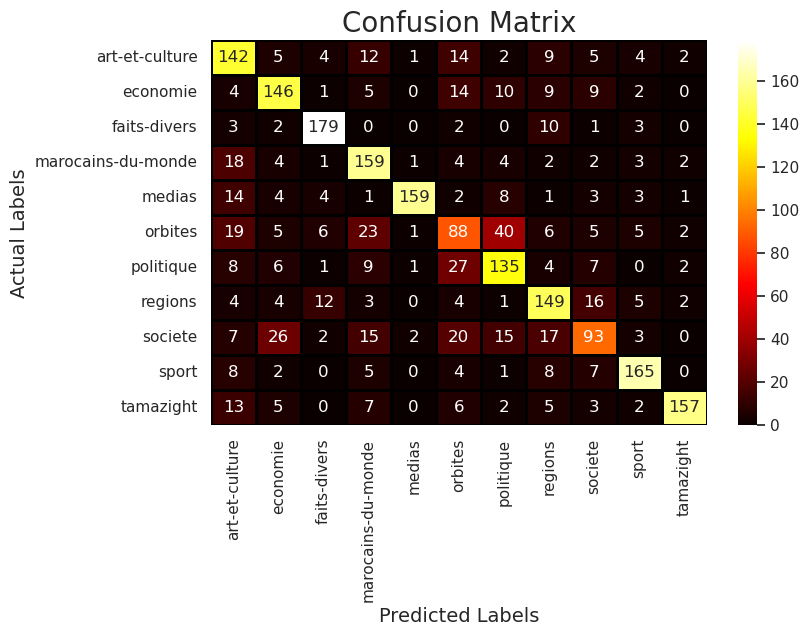

In [50]:
c = confusion_matrix(yval, pred2)

plt.figure(figsize = (8, 5))
c = pd.DataFrame(c , index = [i for i in np.unique(le.inverse_transform(df_test.topic))] , columns = [i for i in np.unique(le.inverse_transform(df_test.topic))])
sns.heatmap(c, linecolor='Black', cmap='hot', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()